In [4]:
import numpy as np
import pandas as pd
from scipy import stats, spatial
import gensim
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# 1. Cosine similarity

## 1.1 Load & Preprocessing Data

In [5]:
emb_df = pd.read_csv('../../ex1/Word-Similarity/word2vec/W2V_150.txt', error_bad_lines=False, skiprows=2, names=list(range(151)), sep=' ',skipinitialspace= True, na_filter=False).drop(columns=[150])
visim_df = pd.read_csv('../../ex1/Word-Similarity/datasets/ViSim-400/Visim-400.txt', sep='\t')

In [6]:
emb_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
những,0.290104,-0.289879,0.416935,1.936890,0.444036,1.187533,-1.278718,-0.335724,-1.059525,-0.405180,...,-0.467682,-0.714711,1.415871,-0.791346,-0.186179,-0.203722,-0.546900,0.511325,-0.597274,-1.138472
tiết_lộ,-1.308045,0.950666,2.340200,-0.433416,-0.244250,1.175481,-0.393907,-2.157170,-1.742790,-1.584158,...,-2.070473,-0.807718,-0.945042,1.240186,-1.445371,1.118764,0.716285,-0.716736,-1.000471,-0.234190
thú_vị,2.561394,2.765394,-2.260592,1.895223,1.024710,0.682792,-0.699010,-1.019593,-0.464209,-1.301042,...,0.321418,0.312818,-1.626791,1.693114,-0.682941,-1.695815,2.805975,0.903519,-0.417958,-0.647090
về,-1.414575,-0.593215,-1.403980,-1.300985,0.946746,0.159904,-0.680019,0.472107,0.164649,-1.172244,...,-0.453686,0.737019,-0.988726,-1.056952,-0.935414,0.333762,0.363725,-0.328541,0.621737,0.719807
wallpaper,0.255411,-1.367197,-0.604347,0.921952,0.158452,0.129826,0.222971,-0.025875,-0.031520,-0.412994,...,-0.439197,1.027919,-0.112004,-1.546653,2.025361,-0.554233,0.257585,-0.034442,-1.357533,0.171804


In [7]:
visim_df.head(5)

,Word1,Word2,POS,Sim1,Sim2,STD
0,biến,ngập,V,3.13,5.22,0.72
1,nhà_thi_đấu,nhà,N,3.07,5.12,1.18
2,động,tĩnh,V,0.60,1.00,0.95
3,khuyết,ưu,N,0.20,0.33,0.40
4,cõi_tục,cõi_âm,N,0.60,1.00,0.95


## 1.2 Implement Function

In [8]:
def f(x):
    try:
        w1_vec = emb_df.loc[x[0]].values
        w2_vec = emb_df.loc[x[1]].values
        sim = (2 - spatial.distance.cosine(w1_vec, w2_vec))/2
        return sim
    except:
        return float('nan')

visim_df['cosine_sim'] = visim_df.apply(lambda x: f(x), axis=1)
visim_df = visim_df.dropna()

In [9]:
visim_df.head(5)

,Word1,Word2,POS,Sim1,Sim2,STD,cosine_sim
0,biến,ngập,V,3.13,5.22,0.72,0.497544
1,nhà_thi_đấu,nhà,N,3.07,5.12,1.18,0.541262
2,động,tĩnh,V,0.60,1.00,0.95,0.638543
3,khuyết,ưu,N,0.20,0.33,0.40,0.588399
5,thủ_pháp,biện_pháp,N,4.13,6.88,1.26,0.701183


## 1.3 Evaluation

In [10]:
pcc_1 = stats.pearsonr(visim_df['Sim1'],visim_df['cosine_sim'])[0]
pcc_2 = stats.pearsonr(visim_df['Sim2'],visim_df['cosine_sim'])[0]
print(f"Pearson correlation coefficient with sim 1: {pcc_1}")
print(f"Pearson correlation coefficient with sim 2: {pcc_2}")

Pearson correlation coefficient with sim 1: 0.44684779863919877
Pearson correlation coefficient with sim 2: 0.4468197550880767


In [11]:
srcc_1 = stats.spearmanr(visim_df['Sim1'],visim_df['cosine_sim'])[0]
srcc_2 = stats.spearmanr(visim_df['Sim2'],visim_df['cosine_sim'])[0]
print(f"Spearman's rank correlation coefficient with sim 1: {srcc_1}")
print(f"Spearman's rank correlation coefficient with sim 2: {srcc_2}")

Spearman's rank correlation coefficient with sim 1: 0.40775688877341687
Spearman's rank correlation coefficient with sim 2: 0.40775688877341687


# 2. K-nearest words

In [12]:
k = 5
w = "máy_vi_tính"

In [13]:
def get_k_nearest_words(word, n_k):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(emb_df.loc[:].values)
    idx = nbrs.kneighbors([emb_df.loc[w].values], return_distance=False)[0][1:].tolist()
    k_words = emb_df.index[idx].tolist()
    return k_words
get_k_nearest_words(k, w)

['máy_tính_xách_tay',
 'máy_vi_tính_xách_tay',
 'điện_thoại_di_động',
 'máy_chữ',
 'máy_đánh_chữ']

# 3. Synonym-antonym classification

## 3.1 Load & Preprocessing Data

In [203]:
ant_df = pd.read_csv('../../ex1/Word-Similarity/antonym-synonym set/Antonym_vietnamese.txt', names=['w1', 'w2'], sep=' ')
syn_df = pd.read_csv('../../ex1/Word-Similarity/antonym-synonym set/Synonym_vietnamese.txt', names=['w1', 'w2'], sep=' ')
noun_df = pd.read_csv('../../ex1/Word-Similarity/datasets/ViCon-400/400_noun_pairs.txt', sep='\t')
verb_df = pd.read_csv('../../ex1/Word-Similarity/datasets/ViCon-400/400_verb_pairs.txt', sep='\t')
adj_df = pd.read_csv('../../ex1/Word-Similarity/datasets/ViCon-400/600_adj_pairs.txt', sep='\t')

In [204]:
test_df = pd.concat([noun_df, verb_df, adj_df], ignore_index=True)

In [205]:
test_df['label'] = test_df['Relation'].apply(lambda x: 1 if x == 'SYN' else 0)

In [206]:
test_df.head(5)

,Word1,Word2,Relation,label
0,khoái_lạc,nỗi_đau,ANT,0
1,yếu_kém,sức_mạnh,ANT,0
2,thanh_danh,ô_nhục,ANT,0
3,dây,dọc,SYN,1
4,bằng_cớ,chứng_cớ,SYN,1


In [207]:
ant_df['label'] = 0 # => antonym is label 0
syn_df['label'] = 1 # => synonym is label 1

In [208]:
ant_df.head(5)

,w1,w2,label
0,ác,hiền,0
1,ác,thiện,0
2,ác_cảm,thiện_cảm,0
3,ác_độc,hiền_lành,0
4,ác_độc,hiền_từ,0


In [209]:
syn_df.head(5)

,w1,w2,label
0,a_dua,a_tòng,1
1,a_dua,vào_hùa,1
2,a_ma_tơ,tài_tử,1
3,a_tòng,vào_hùa,1
4,à_ơi,ạ_ơi,1


In [210]:
#Generate training data
train_df = pd.concat([ant_df, syn_df], ignore_index=True)

In [211]:
train_df.head(5)

,w1,w2,label
0,ác,hiền,0
1,ác,thiện,0
2,ác_cảm,thiện_cảm,0
3,ác_độc,hiền_lành,0
4,ác_độc,hiền_từ,0


In [212]:
train_df.shape

(13562, 3)

In [213]:
test_df.shape

(1400, 4)

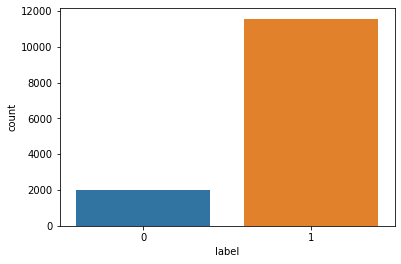

In [214]:
sns.countplot(train_df['label'])

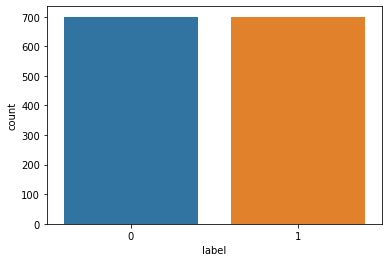

In [215]:
sns.countplot(test_df['label'])

## Handle Imbalance Data

In [216]:
drop_indices = np.random.choice(train_df[train_df['label']==1].index, 8000, replace=False)
train_df = train_df.drop(drop_indices)

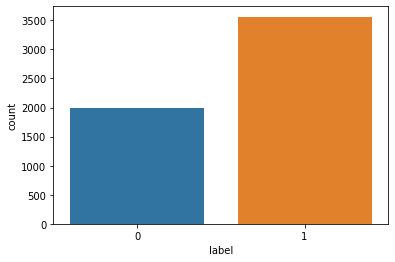

In [217]:
sns.countplot(train_df['label'])

## 3.2 Feature Engineering

### Load Embedding 

In [218]:
EMBEDDING_NAME = 'w2v_150'

In [219]:
if EMBEDDING_NAME == 'w2v_150':
    model = emb_df
elif EMBEDDING_NAME == 'w2v_wiki_400': 
    model = gensim.models.KeyedVectors.load_word2vec_format('../../ex1/Word-Similarity/word2vec/wiki.vi.model.bin', binary=True)

### Feature Extraction

In [220]:
def f(x):
    try:
        if EMBEDDING_NAME == 'w2v_150': 
            w1_vec = model.loc[x[0]].to_numpy()
            w2_vec = model.loc[x[1]].to_numpy()
        elif EMBEDDING_NAME == 'w2v_wiki_400':
            w1_vec = model[x[0]]
            w2_vec = model[x[1]]
        sim = spatial.distance.cosine(w1_vec, w2_vec)
        return sim
    except:
        return float('nan')

train_df['cosine_sim'] = train_df.apply(lambda x: f(x), axis=1)
test_df['cosine_sim'] = test_df.apply(lambda x: f(x), axis=1)

In [221]:
def f(x):
    try:
        if EMBEDDING_NAME == 'w2v_150': 
            w1_vec = model.loc[x[0]].to_numpy()
            w2_vec = model.loc[x[1]].to_numpy()
        elif EMBEDDING_NAME == 'w2v_wiki_400':
            w1_vec = model[x[0]]
            w2_vec = model[x[1]]
        sim = spatial.distance.euclidean(w1_vec, w2_vec)
        return sim
    except:
        return float('nan')

train_df['euclide_sim'] = train_df.apply(lambda x: f(x), axis=1)
test_df['euclide_sim'] = test_df.apply(lambda x: f(x), axis=1)

In [222]:
def f(x):
    try:
        if EMBEDDING_NAME == 'w2v_150': 
            w1_vec = model.loc[x[0]].to_numpy()
            w2_vec = model.loc[x[1]].to_numpy()
        elif EMBEDDING_NAME == 'w2v_wiki_400':
            w1_vec = model[x[0]]
            w2_vec = model[x[1]]
        sim = stats.pearsonr(w1_vec, w2_vec)[0]
        return sim
    except:
        return float('nan')

train_df['pcc'] = train_df.apply(lambda x: f(x), axis=1)
test_df['pcc'] = test_df.apply(lambda x: f(x), axis=1)

In [223]:
train_df.isna().sum()

w1                0
w2                1
label             0
cosine_sim     1888
euclide_sim    1888
pcc            1888
dtype: int64

In [224]:
test_df.isna().sum()

Word1            0
Word2            0
Relation         0
label            0
cosine_sim     227
euclide_sim    227
pcc            227
dtype: int64

In [225]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [226]:
train_df.head(5)

,w1,w2,label,cosine_sim,euclide_sim,pcc
0,ác,hiền,0,0.818903,16.777955,0.172329
1,ác,thiện,0,0.791902,17.690477,0.175360
2,ác_cảm,thiện_cảm,0,0.409032,18.295017,0.594726
3,ác_độc,hiền_lành,0,0.590656,14.668525,0.406149
4,ác_độc,hiền_từ,0,0.775007,14.011500,0.218937


In [227]:
test_df.head(5)

,Word1,Word2,Relation,label,cosine_sim,euclide_sim,pcc
0,khoái_lạc,nỗi_đau,ANT,0,0.754234,16.834577,0.249734
1,yếu_kém,sức_mạnh,ANT,0,0.828628,18.374029,0.171366
2,thanh_danh,ô_nhục,ANT,0,0.911014,16.266694,0.088963
3,dây,dọc,SYN,1,0.858338,16.180636,0.150397
5,ba,me,ANT,0,1.048281,15.954571,-0.048827


## 3.3 Learning

### Training

In [228]:
features = ['cosine_sim', 'euclide_sim']

In [229]:
clf = LogisticRegression(random_state=0).fit(train_df[features].values, train_df['label'].values)

### Predict

In [230]:
test_df['prediction'] = clf.predict(test_df[features].values)

## 3.4 Evaluation

In [231]:
print(classification_report(test_df['label'].values, test_df['prediction'].values))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       639
           1       0.60      0.67      0.63       534

    accuracy                           0.65      1173
   macro avg       0.65      0.65      0.65      1173
weighted avg       0.65      0.65      0.65      1173



In [232]:
print(confusion_matrix(test_df['label'].values, test_df['prediction'].values))

[[402 237]
 [176 358]]


In [234]:
f1_score(test_df['label'].values, test_df['prediction'].values)

0.6341895482728077